# Hack4Good Helvetas Team
## Exploratory Data Analysis

### 1. Preprocessed Helvetas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime
#from PyAstronomy import pyasl

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
%reload_kedro

2020-11-01 19:11:26,660 - root - INFO - ** Kedro project Helvetas Hack4Good
2020-11-01 19:11:26,660 - root - INFO - Defined global variable `context` and `catalog`


In [2]:
data = catalog.load("preprocessed_helvetas")

2020-11-01 17:03:02,134 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_helvetas` (PickleDataSet)...


/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323656 entries, 0 to 323655
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   adrnum           323656 non-null  int64         
 1   quelle           269387 non-null  object        
 2   sprachcd         323554 non-null  object        
 3   gescode          320922 non-null  object        
 4   vname            323656 non-null  object        
 5   land             314859 non-null  object        
 6   plz              314620 non-null  float64       
 7   ort              314799 non-null  object        
 8   kanton           312311 non-null  object        
 9   gebjah           90762 non-null   float64       
 10  andat            323656 non-null  datetime64[ns]
 11  qty_donations    323656 non-null  int64         
 12  LTV_donations    323656 non-null  float64       
 13  AVG_donation     323656 non-null  float64       
 14  first_donation   323

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

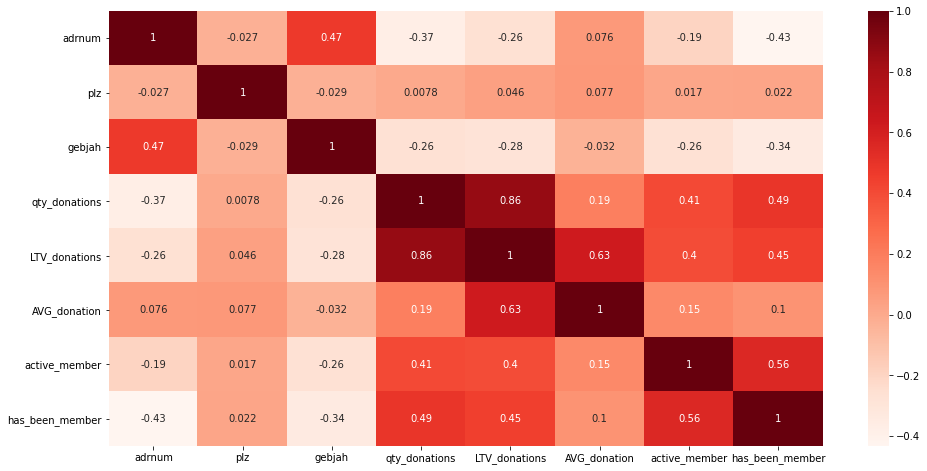

In [10]:
plt.figure(figsize=(16,8))
cor = data.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [20]:
# Labeled data
labeled = data[data['gebjah'].notnull()].copy()

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

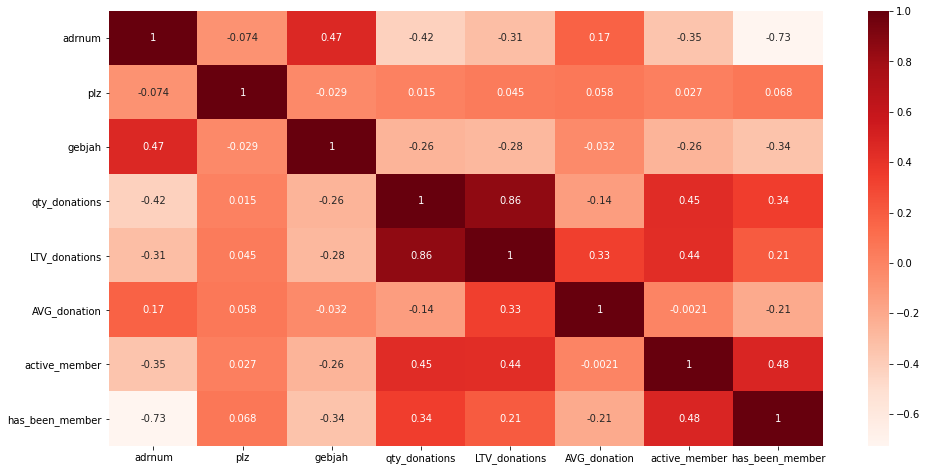

In [21]:
plt.figure(figsize=(16,8))
cor2 = labeled.corr(method='spearman')
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)

(1900.0, 2020.0)

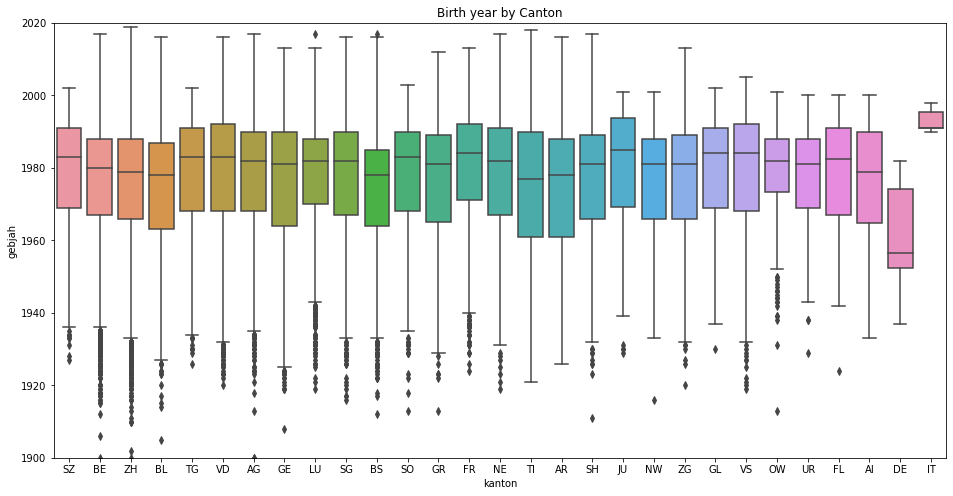

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "kanton", y = "gebjah", data=labeled)
plt.title("Birth year by Canton")
plt.ylim(1900, 2020)

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1900.0, 2020.0)

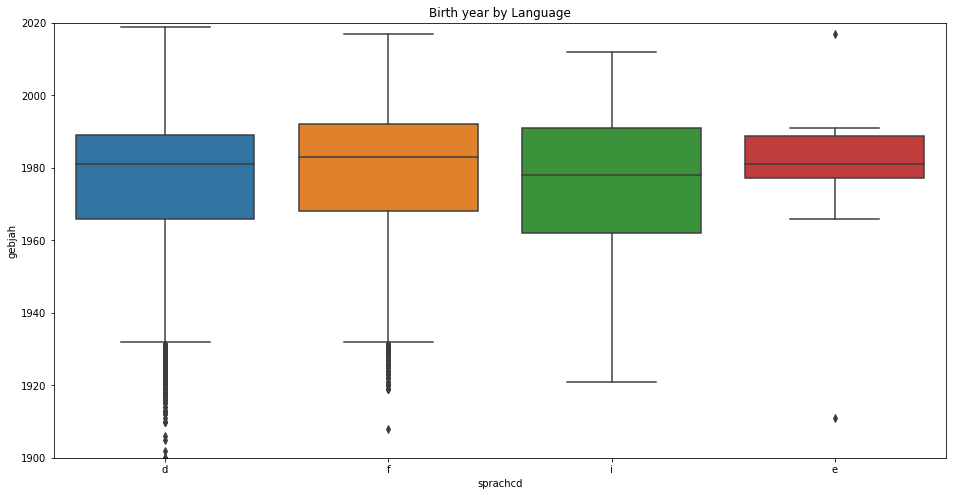

In [23]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "sprachcd", y = "gebjah", data=labeled)
plt.title("Birth year by Language")
plt.ylim(1900, 2020)

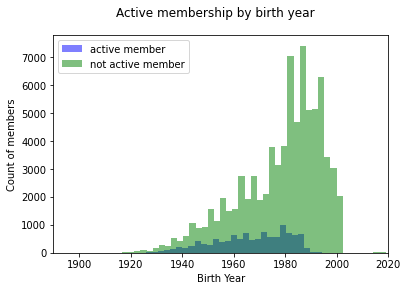

In [30]:
fig, ax = plt.subplots()

ax.hist(labeled[labeled["active_member"]]["gebjah"], bins=50, alpha=0.5, color="blue", label="active member")
ax.hist(labeled[~labeled["active_member"]]["gebjah"], bins=50, alpha=0.5, color="green", label="not active member")

ax.set_xlabel("Birth Year")
ax.set_ylabel("Count of members")
plt.xlim(1890, 2020)
fig.suptitle("Active membership by birth year")

ax.legend();

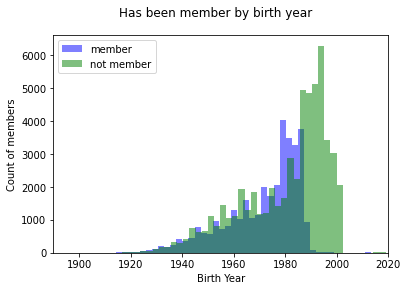

In [32]:
fig, ax = plt.subplots()

ax.hist(labeled[labeled["has_been_member"]]["gebjah"], bins=50, alpha=0.5, color="blue", label="member")
ax.hist(labeled[~labeled["has_been_member"]]["gebjah"], bins=50, alpha=0.5, color="green", label="not member")

ax.set_xlabel("Birth Year")
ax.set_ylabel("Count of members")
plt.xlim(1890, 2020)
fig.suptitle("Has been member by birth year")

ax.legend();

### 2. Features Helvetas

In [90]:
data = catalog.load("features_data")

2020-11-01 17:40:35,960 - kedro.io.data_catalog - INFO - Loading data from `features_data` (PickleDataSet)...


/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344551 entries, 0 to 344550
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   adrnum               344551 non-null  int64         
 1   quelle               344551 non-null  object        
 2   sprachcd             344449 non-null  object        
 3   gescode              341817 non-null  object        
 4   vname                344551 non-null  object        
 5   land                 335342 non-null  object        
 6   plz                  335089 non-null  float64       
 7   ort                  335280 non-null  object        
 8   kanton               332654 non-null  object        
 9   gebjah               98009 non-null   float64       
 10  andat                344551 non-null  datetime64[ns]
 11  qty_donations        344551 non-null  int64         
 12  LTV_donations        344551 non-null  float64       
 13  AVG_donation  

In [112]:
# Labeled data
labeled = data[data['gebjah'].notnull()].copy()

<AxesSubplot:>

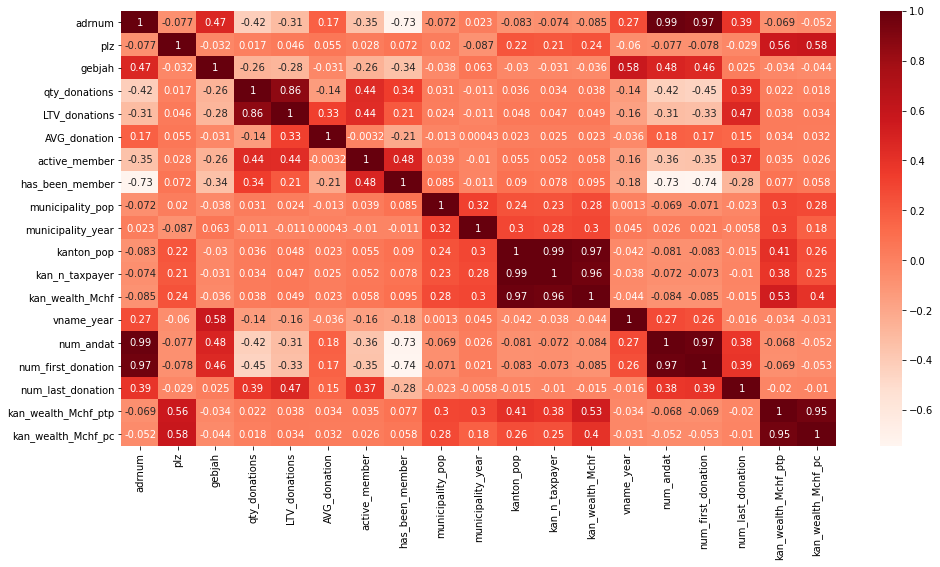

In [48]:
plt.figure(figsize=(16,8))
cor2 = labeled.corr(method='spearman')
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)

In [114]:
# Log transform
cols = ['municipality_pop','mun_n_taxpayers', 'mun_income_kCHF', 'kanton_pop',
       'kan_n_taxpayer', 'kan_wealth_Mchf', 'mun_income_kCHF_pc',
       'mun_income_kCHF_ptp', 'kan_wealth_Mchf_ptp', 'kan_wealth_Mchf_pc']
for col in cols:
        labeled['log_' + col] = labeled[col].astype('float')
        labeled['log_' + col] = np.log(labeled['log_' + col])


In [135]:
plt.figure(figsize=(16,8))
cor3 = labeled.corr(method='spearman')
#sns.heatmap(cor3.iloc[2], annot=True, cmap=plt.cm.Reds)
cor3.iloc[2]

adrnum                     0.472671
plz                       -0.032083
gebjah                     1.000000
qty_donations             -0.259965
LTV_donations             -0.278245
AVG_donation              -0.031358
active_member             -0.258921
has_been_member           -0.340131
municipality_pop          -0.037537
municipality_year          0.063150
kanton_pop                -0.030445
kan_n_taxpayer            -0.030507
kan_wealth_Mchf           -0.036130
vname_year                 0.576009
num_andat                  0.484030
num_first_donation         0.456118
num_last_donation          0.024845
kan_wealth_Mchf_ptp       -0.033828
kan_wealth_Mchf_pc        -0.044415
log_municipality_pop      -0.037537
log_mun_n_taxpayers       -0.039663
log_mun_income_kCHF       -0.047162
log_kanton_pop            -0.030445
log_kan_n_taxpayer        -0.030507
log_kan_wealth_Mchf       -0.036130
log_mun_income_kCHF_pc    -0.055091
log_mun_income_kCHF_ptp   -0.066981
log_kan_wealth_Mchf_ptp   -0

<Figure size 1152x576 with 0 Axes>

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


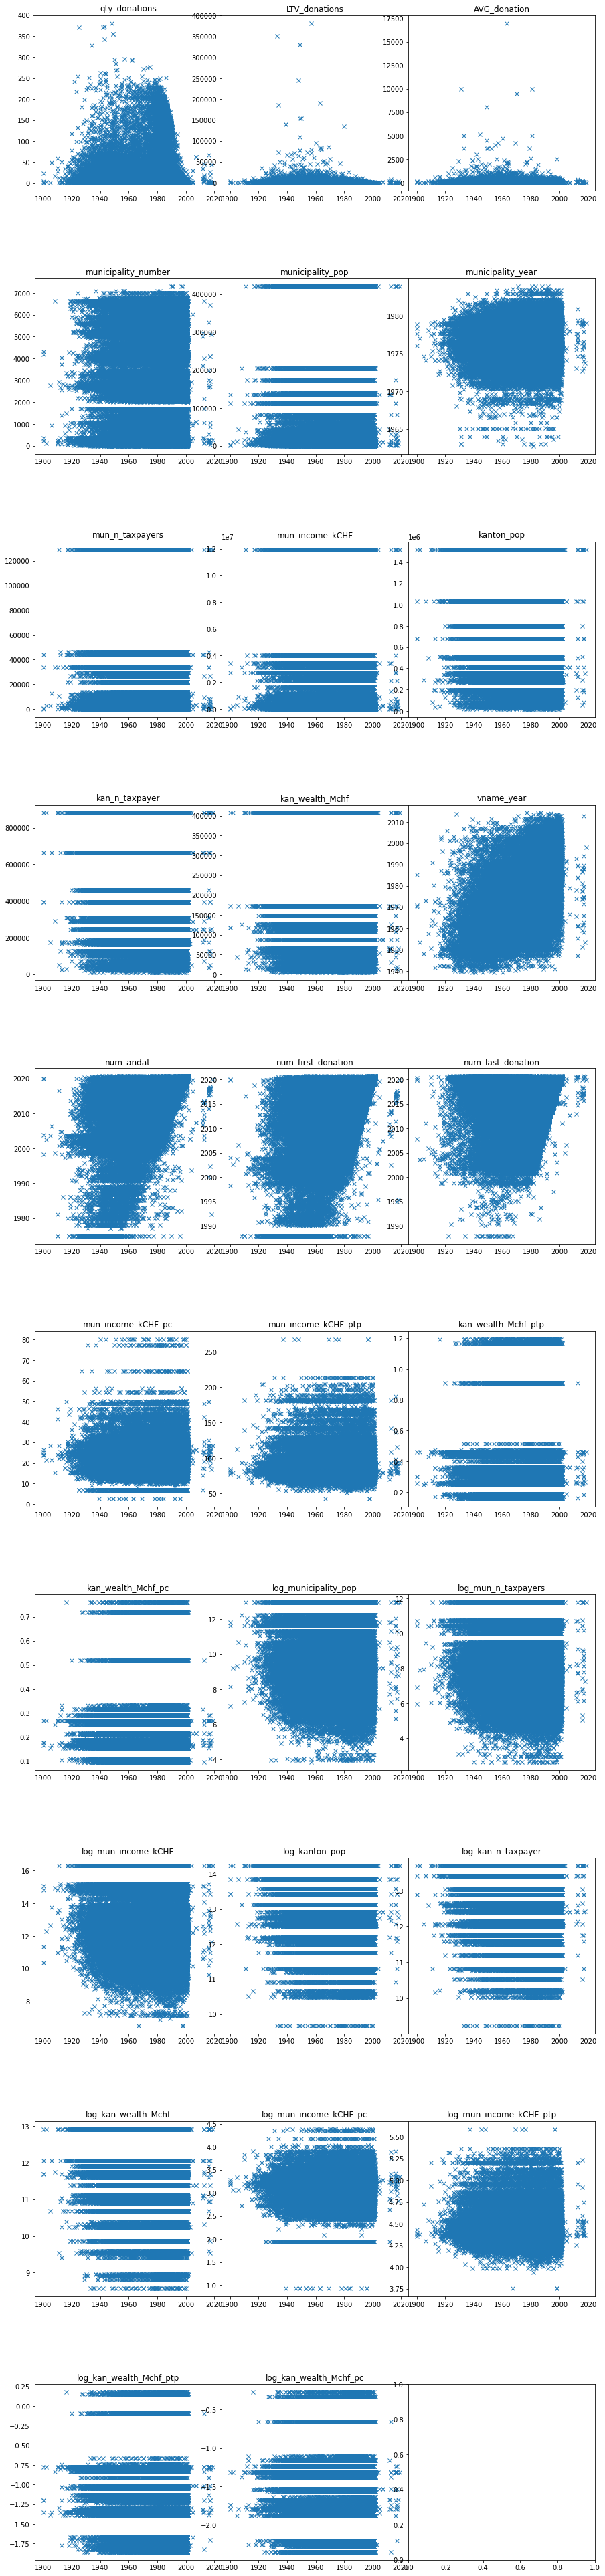

In [156]:
labeled.columns
fig, axs = plt.subplots(10, 3, figsize=(15, 70), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
cols = ['qty_donations', 'LTV_donations',
       'AVG_donation', 'municipality_number', 'municipality_pop',
       'municipality_year', 'mun_n_taxpayers', 'mun_income_kCHF', 'kanton_pop',
       'kan_n_taxpayer', 'kan_wealth_Mchf', 'vname_year', 'num_andat',
       'num_first_donation', 'num_last_donation', 'mun_income_kCHF_pc',
       'mun_income_kCHF_ptp', 'kan_wealth_Mchf_ptp', 'kan_wealth_Mchf_pc',
       'log_municipality_pop',
       'log_mun_n_taxpayers', 'log_mun_income_kCHF', 'log_kanton_pop',
       'log_kan_n_taxpayer', 'log_kan_wealth_Mchf', 'log_mun_income_kCHF_pc',
       'log_mun_income_kCHF_ptp', 'log_kan_wealth_Mchf_ptp',
       'log_kan_wealth_Mchf_pc']



for i in range(len(plot_vars)):
    axs[i].plot(labeled.gebjah, labeled[plot_vars[i]], 'x')
    axs[i].set_title(plot_vars[i])


In [160]:
from sklearn.feature_selection import f_regression
labeled2 = labeled.dropna()
pd.DataFrame({'var': cols, 'F': f_regression(labeled2[plot_vars], labeled2.gebjah)[0], 'p-value': f_regression(labeled2[plot_vars], labeled2.gebjah)[1]})


/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


var             F        p-value
0             qty_donations    958.141186  3.742753e-209
1             LTV_donations   1586.880378   0.000000e+00
2              AVG_donation    422.136599   1.448430e-93
3       municipality_number    102.184428   5.226944e-24
4          municipality_pop     31.533951   1.966218e-08
5         municipality_year    363.258177   8.259738e-81
6           mun_n_taxpayers     30.090523   4.135673e-08
7           mun_income_kCHF     28.519833   9.299210e-08
8                kanton_pop    111.389467   5.054222e-26
9            kan_n_taxpayer    117.217612   2.685308e-27
10          kan_wealth_Mchf    146.498900   1.079741e-33
11               vname_year  42552.007554   0.000000e+00
12                num_andat  20798.235557   0.000000e+00
13       num_first_donation  16892.376268   0.000000e+00
14        num_last_donation      0.627899   4.281295e-01
15       mun_income_kCHF_pc    100.748759   1.078006e-23
16      mun_income_kCHF_ptp    266.894671   6.721058e-60
17      kan_wealth_Mchf_ptp     35.913825   2.071055e-09
18       kan_wealth_Mchf_pc     40.356535   2.127117e-10
19     log_municipality_pop     96.994832   7.159156e-23
20      log_mun_n_taxpayers     88.722578   4.656356e-21
21      log_mun_income_kCHF    121.957189   2.470956e-28
22           log_kanton_pop     62.327717   2.944115e-15
23       log_kan_n_taxpayer     69.381440   8.239425e-17
24      log_kan_wealth_Mchf    123.484252   1.145808e-28
25   log_mun_income_kCHF_pc     83.243122   7.415834e-20
26  log_mun_income_kCHF_ptp    310.297597   2.532798e-69
27  log_kan_wealth_Mchf_ptp    100.825819   1.036922e-23
28   log_kan_wealth_Mchf_pc    118.715480   1.263280e-27

/usr/local/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, '')

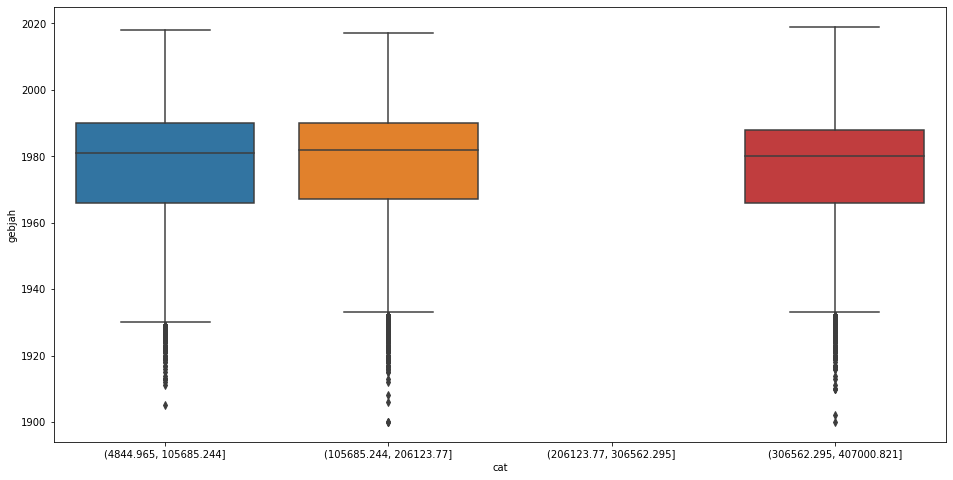

In [161]:
labeled.columns
labeled['cat'] = pd.cut(labeled['kan_wealth_Mchf'],
                                   bins=4)

plt.figure(figsize=(16,8))
ax = sns.boxplot(x = "cat", y = "gebjah", data=labeled)
plt.title("")
#ax.set(yscale="log")